In [382]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def eBL(L,beta=1,s=5000):
    """
    Return approximate matrix exponential of L"""
    return np.linalg.matrix_power(np.eye(L.shape[0])+beta*L/s,s)

def rbf(X1,X2,l=1.0):
    """RBF covariance between x1 and x2, lengthscale l
    X1 and X2 are N1x1 and N2x1 matrices. Returns N1xN2 matrix of covariances"""
    assert len(X1.shape)==2
    assert len(X2.shape)==2
    assert X1.shape[1]==1
    assert X2.shape[1]==1
    return np.exp(-(X1-X2.T)**2/(2*l**2))
   
def buildL(N,W):
    L = []
    for i,(n,w) in enumerate(zip(N,W)):
        Lrow = np.zeros(len(N))
        Lrow[n]=w
        Lrow[i] = -np.sum(Lrow)
        L.append(Lrow)
    return np.array(L)

def buildstraightlinenetwork(num=10,w=1):
    N = [[1]]
    W = [[w]]
    for i in range(1,num-1):
        N.append([i-1,i+1])
        W.append([w,w])
    N.append([num-2])
    W.append([w])
    return N,W


In [386]:
rbf(np.array([[0]]),np.array([[1]]))

array([[0.60653066]])

In [402]:
np.sqrt(60)

7.745966692414834

15.491933384829668

In [452]:
rbf(np.array([[0]]),np.array([[1]]),np.sqrt(beta*2))[0,0]/2

0.4986130383385739

Text(0.5, 0, "x'")

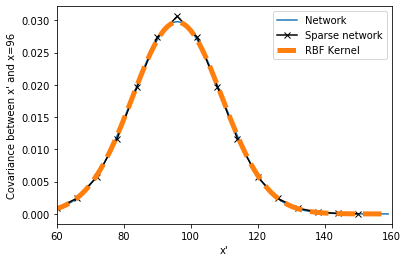

In [471]:
#network
beta = 90
N,W = buildstraightlinenetwork(160,rbf(np.array([[0]]),np.array([[1]]),np.sqrt(beta*2))[0,0])#rbf(np.array([[0]]),np.array([[1]]))[0,0])
L = buildL(N,W)
step = 6
ratio = rbf(np.array([[0]]),np.array([[1]]),np.sqrt(beta*2))[0,0]/(step**2)
Nsparse,Wsparse = buildstraightlinenetwork(int(160/step),ratio)#rbf(np.array([[0]]),np.array([[2.4]]))[0,0])#0.25)
Lsparse = buildL(Nsparse,Wsparse)
X = np.arange(len(L))
cov = eBL(L,beta=beta)
plt.plot(X,cov[:,96],label="Network")
Xsparse = step*np.arange(len(Lsparse))
covsparse = eBL(Lsparse,beta=beta)

#I'M HAVING TO NORMALISE THIS... WHICH NEEDS THINKING ABOUT!
covsparse = covsparse*np.sum(cov[:,96])/np.sum(covsparse[:,int(96/step)])/step
plt.plot(Xsparse,covsparse[:,int(96/step)],'k-x',label="Sparse network")
plt.xlim([60,160])

#From textbook we can see that the lengthscale is equivalent to sqrt(beta*2), see text around eq 1.3 and 1.4?
rbfvals = rbf(np.array([[96]]),X[:,None],np.sqrt(beta*2))[0,:]
rbfvals/=np.sum(rbfvals)
plt.plot(X,rbfvals,'--',lw=5,label="RBF Kernel")
plt.legend()
plt.ylabel('Covariance between x\' and x=96')
plt.xlabel('x\'')